# Reading Data, Cleaning and Visualizing

## Importing important libraries and initializing jupyter magic

In [39]:
import os
import pandas as pd          #  DataFrame i.e. Tablen von Daten zu bearbeiten, manipulieren usw.
from xml.dom import minidom  # Xml lesen und bearbeiten tool
import numpy as np           # Sehr agiles Mathematik tool
import matplotlib.pyplot as plt  # Ein basic library für daten visualizierung
import skansensor as ss     #  Fady's für Skan und Steffen selbstgemachtes library
%matplotlib inline          
# Notebook magic um zu Plots schnell zu zeichnen

## List files in a directory

In [40]:
l_dir = os.listdir('./1811')
l_dir

['.Rhistory', 'Sense.MTA', 'Piccaro.dat']

## Function to read the .MTA file and extract the data into a pandas DataFrame

## Read Dropsense Data

In [41]:
df_dropsense = ss.read_dropsense('./1811/Sense.MTA')

## Read Piccaro Data

In [42]:
df_picarro = ss.read_picarro('./1811/Piccaro.dat')

### Choose only the data more than 500s

In [43]:
df_dropsense = ss.trunc_after_time(df_dropsense)
df_picarro = ss.trunc_after_time(df_picarro)

## filter the Dropsense data according to the time interval provided by Piccaro

In [44]:
df_fitted = ss.fit(df_picarro, df_dropsense)

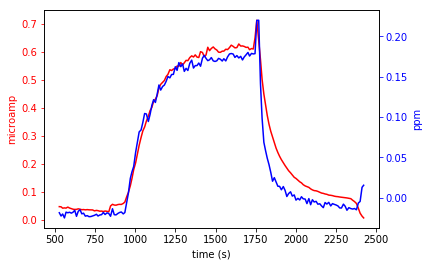

In [45]:
fig, ax1 = plt.subplots()

ax1.plot(df_fitted['time'], df_fitted['data_dropsense'], c='r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('microamp' , color='r')
ax1.tick_params('y',colors='r')

ax2 = ax1.twinx()
ax2.plot(df_fitted['time'], df_fitted['data_picarro'], c='b')
ax2.set_ylabel('ppm', color='b')
ax2.tick_params('y', colors='b')

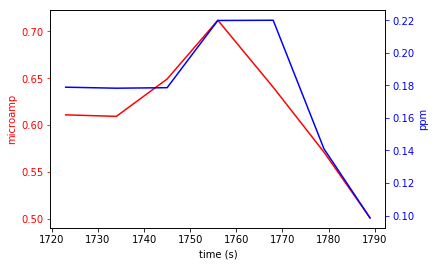

In [46]:
zoom = df_fitted[(df_fitted['time']<1800) & (df_fitted['time']>1720)]
fig, ax1 = plt.subplots()

ax1.plot(zoom['time'], zoom['data_dropsense'], c='r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('microamp' , color='r')
ax1.tick_params('y',colors='r')

ax2 = ax1.twinx()
ax2.plot(zoom['time'], zoom['data_picarro'], c='b')
ax2.set_ylabel('ppm', color='b')
ax2.tick_params('y', colors='b')

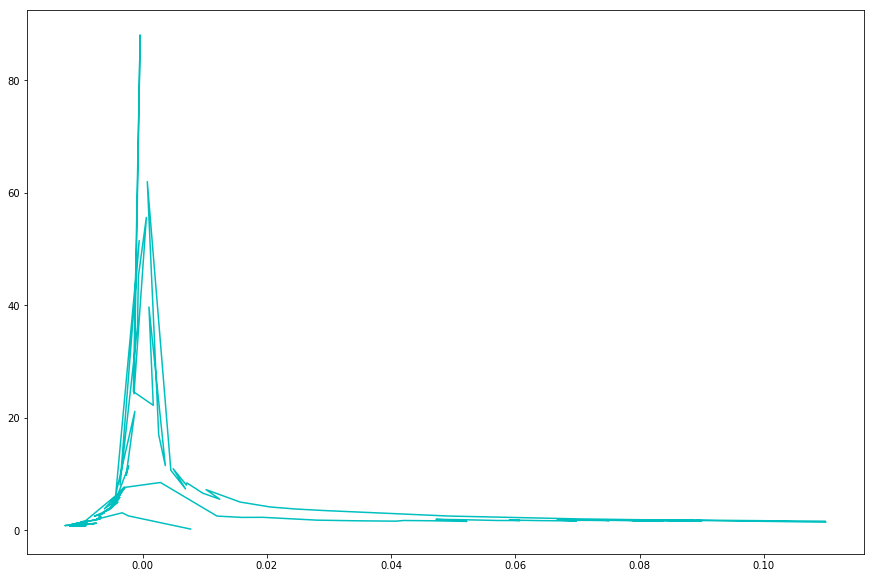

In [47]:
ds = df_fitted['data_dropsense']
p = np.abs(df_fitted['data_picarro'])

df_fitted['mamp_per_ppm'] = ds/p

fig = plt.figure(figsize=(15,10))
plt.plot(df_fitted['data_picarro']/2, df_fitted['mamp_per_ppm']/2, 'c')

In [48]:
z = zip(df_fitted['data_picarro'], df_fitted['mamp_per_ppm'])
list(z)

[(-0.018645523586, 2.524734678695013),
 (-0.022704841565, 2.0458191644729937),
 (-0.020204488892, 2.057917437172258),
 (-0.025058810841, 1.6980055546124229),
 (-0.017910070652, 2.3369070291928855),
 (-0.018672481395, 2.435402185602231),
 (-0.018047218498, 2.327921059118104),
 (-0.019160087135, 2.0835413074440594),
 (-0.01790699658, 2.1113721014627007),
 (-0.015622876957000001, 2.3768564587818766),
 (-0.023095095517, 1.6177677192327673),
 (-0.016869843156, 2.3261430255824957),
 (-0.014887110801, 2.548345109210288),
 (-0.019980740908, 1.8044459995757431),
 (-0.019210697599, 1.90887570901688),
 (-0.022859402828000003, 1.5598978358403508),
 (-0.022244466374, 1.6389843382628229),
 (-0.023536444439, 1.516619559615888),
 (-0.023313683616999998, 1.5196727630877502),
 (-0.022614373977000002, 1.5609541098021082),
 (-0.021809272132000002, 1.4682212595722954),
 (-0.020547217271, 1.6378942976136692),
 (-0.022695825737000002, 1.4413443414253158),
 (-0.021429297129, 1.4363125311444271),
 (-0.02103069

In [49]:
import seaborn as sns

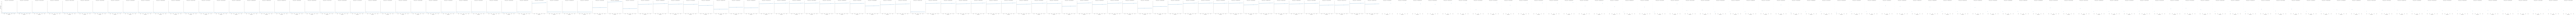

In [55]:

sns.lmplot(x='data_picarro', y='data_dropsense',col='mamp_per_ppm', data=df_fitted)